In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# pd.set_option('max_colwidth', 50)
# set this if you need to

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [134]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head()
# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [135]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head()

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94.0,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92.0,20140114,Routine - Unscheduled
4,19,94.0,20141110,Routine - Unscheduled


In [136]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [137]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html

df = pd.merge(businesses,inspections, how='inner', on='business_id', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False)
df.head()

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip,Score,date,type
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,NaN,20140807,Reinspection/Followup
1,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,94.0,20140729,Routine - Unscheduled
2,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,NaN,20140124,Reinspection/Followup
3,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,92.0,20140114,Routine - Unscheduled
4,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109,94.0,20141110,Routine - Unscheduled


In [138]:
final = pd.merge(df,violations,on='business_id')
final.head()

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,...,owner_city,owner_state,owner_zip,Score,date_x,type,date_y,ViolationTypeID,risk_category,description
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,NaN,20140807,Reinspection/Followup,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,NaN,20140807,Reinspection/Followup,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,NaN,20140807,Reinspection/Followup,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,NaN,20140807,Reinspection/Followup,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,NaN,20140807,Reinspection/Followup,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [139]:
# 2 Which ten business have had the most inspections?

final.name.value_counts().head(10)

Yama Sushi Restaurant           736
Lers Ros Thai Noodle            685
Dol-Ho Restaurant               684
Dragon River Restaurant         646
Cafe Bakery                     621
RIVERSIDE SEAFOOD RESTAURANT    570
Peet's Coffee & Tea             557
Chez Fayala                     544
The Brick Yard                  504
Sunmoon Market, Inc.            480
Name: name, dtype: int64

In [140]:
# 3 Group and count the inspections by type

#group = final.groupby('type')
#group

final.type.value_counts().head()

Routine - Unscheduled        128015
Reinspection/Followup         67793
Complaint                     18157
New Ownership                  8646
Non-inspection site visit      7683
Name: type, dtype: int64

In [141]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap

import seaborn as sns

#final['date_x']=pd.to_datetime(final.date_x, format='%Y%m%d')
#sns.heatmap(final)


#sns.heatmap([final.city, final.date], annot=True, fmt="d")

In [142]:
# 5 Which zip code contains the most high risk violations?
final.postal_code[final.risk_category=='High Risk'].value_counts().head()

94133    3640
94110    3595
94109    2833
94122    2624
94103    2606
Name: postal_code, dtype: int64

In [143]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?

final.risk_category[final.type=='New Ownership'].value_counts().head()

# Low Risk

Low Risk         4431
Moderate Risk    2952
High Risk        1263
Name: risk_category, dtype: int64

In [144]:
# 7 Examining the descriptions, what is the most common violation?
final.description.value_counts().head()

Unclean or degraded floors walls or ceilings          20839
Moderate risk food holding temperature                15040
Unapproved or unmaintained equipment or utensils      14135
Inadequate and inaccessible handwashing facilities    14000
Unclean nonfood contact surfaces                      13742
Name: description, dtype: int64

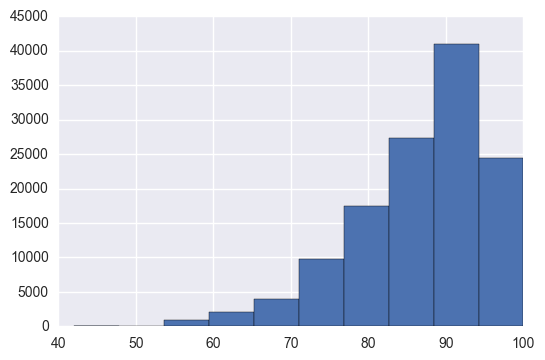

In [145]:
# 8 Create a hist of the scores with 10 bins
final.Score.hist(bins=10)

In [146]:
# 9 Can you predict risk category based on the other features in this dataset?
# You could use score to determine if there is potential for future risk by determining if there was a drop in score per every inspection.


In [147]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

In [148]:
############################
### A Little More Morbid ###
############################

In [149]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [167]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race

killings.rename(columns={'lawenforcementagency': 'agency', 'raceethnicity': 'race', 'Unnamed: 0': 'unnamed'}, inplace=True)
killings.head()

,unnamed,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [151]:
# 2. Show the count of missing values in each column
killings.isnull()         
killings.isnull().sum()


Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [152]:
# 3. replace each null value in the dataframe with the string "Unknown"
killings.streetaddress.fillna(value='Unknown', inplace=True)
killings

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669
5,5,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,Phoenix Police Department,Gunshot,No,53596
6,6,Adrian Hernandez,22,Male,Hispanic/Latino,March,27,2015,4000 Union Ave,Bakersfield,CA,Bakersfield Police Department,Gunshot,Firearm,48552
7,7,Adrian Solis,35,Male,Hispanic/Latino,March,26,2015,1500 Bayview Ave,Wilmington,CA,Los Angeles Police Department,Gunshot,Non-lethal firearm,55909
8,8,Alan Alverson,44,Male,White,January,28,2015,Pickett Runn Rd,Sunset,TX,Wise County Sheriff's Department and Texas DPS,Gunshot,Firearm,38310
9,9,Alan James,31,Male,White,February,7,2015,200 Abbie St SE,Wyoming,MI,Kentwood Police Department and Wyoming DPS,Gunshot,Other,51667


In [153]:
# 4. How many killings were there so far in 2015?
killings.describe()

#467

,Unnamed: 0,age,day,year,county_income
count,467.000000,467.000000,467.000000,467.0,467.000000
mean,233.000000,37.351178,15.830835,2015.0,52527.331906
std,134.955548,12.944617,8.658970,0.0,12948.263811
min,0.000000,16.000000,1.000000,2015.0,22545.000000
25%,116.500000,28.000000,8.000000,2015.0,43804.000000
50%,233.000000,35.000000,16.000000,2015.0,50856.000000
75%,349.500000,45.000000,23.000000,2015.0,56832.000000
max,466.000000,87.000000,31.000000,2015.0,110292.000000


In [154]:
# 5. Of all killings, how many were male and how many female?
killings.gender.value_counts()

Male      445
Female     22
Name: gender, dtype: int64

In [155]:
# 6. How many killings were of unarmed people?
killings.armed.value_counts()


Firearm               230
No                    102
Knife                  68
Other                  26
Vehicle                18
Non-lethal firearm     14
Unknown                 7
Disputed                2
Name: armed, dtype: int64

In [156]:
# 7. What percentage of all killings were unarmed?

killings.armed.value_counts() / len(killings.armed)

Firearm               0.492505
No                    0.218415
Knife                 0.145610
Other                 0.055675
Vehicle               0.038544
Non-lethal firearm    0.029979
Unknown               0.014989
Disputed              0.004283
Name: armed, dtype: float64

In [157]:
# 8. What are the 5 states with the most killings?

killings.state.value_counts().head()

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [158]:
# 9. Show a value counts of deaths for each race
killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

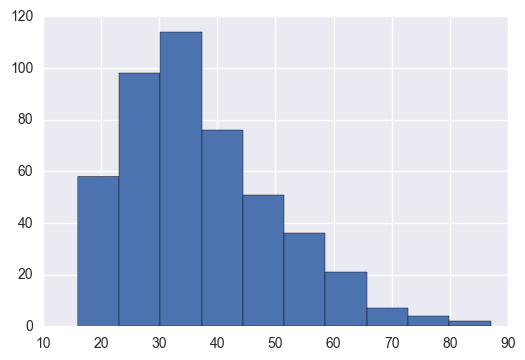

In [159]:
# 10. Display a histogram of ages of all killings

killings.age.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x135bd5fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1247d5550>]], dtype=object)

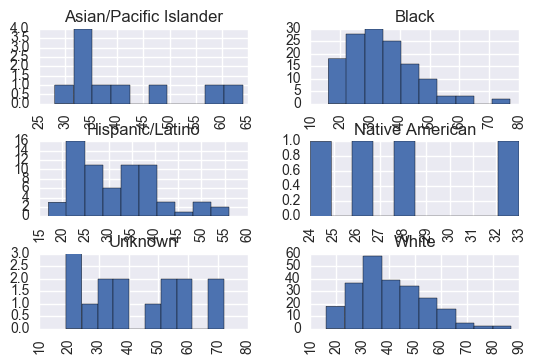

In [160]:
# 11. Show 6 histograms of ages by race
killings.age.hist(by=killings.race)

In [161]:
# 12. What is the average age of death by race?
killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

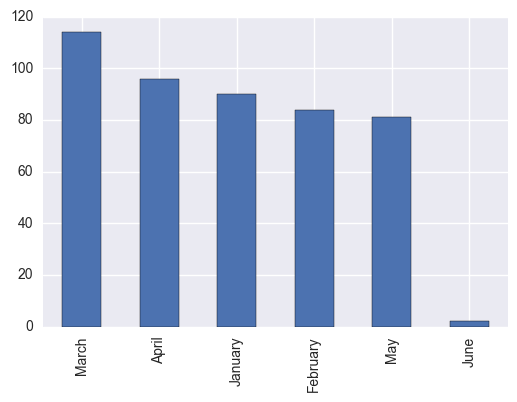

In [171]:
# 13. Show a bar chart with counts of deaths every month
killings.month.value_counts().plot(kind='bar')

In [32]:
###################
### Less Morbid ###
###################

In [33]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [34]:
# 1. Delete the columns (employed_full_time_year_round, major_code)

majors.drop(['Major_code','Employed_full_time_year_round'], axis = 1).head(10)

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0
5,5,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,2070,0.031791,50000,35000,75000.0
6,6,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,264,0.050867,63000,39400,88000.0
7,7,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,261,0.039230,52000,35000,75000.0
8,8,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,4736,0.051290,52000,38000,75000.0
9,9,FORESTRY,Agriculture & Natural Resources,69447,48228,2144,0.042563,58000,40500,80000.0


In [35]:
# 2. Show the cout of missing values in each column

majors.isnull()         
majors.isnull().sum() 

Unnamed: 0                       0
Major_code                       0
Major                            0
Major_category                   0
Total                            0
Employed                         0
Employed_full_time_year_round    0
Unemployed                       0
Unemployment_rate                0
Median                           0
P25th                            0
P75th                            0
dtype: int64

In [36]:
# 3. What are the top 10 highest paying majors?

majors[['Major','P75th']].sort_index(by='P75th', ascending = False).head(10)



/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Major,P75th
59,PETROLEUM ENGINEERING,210000.0
97,MATHEMATICS AND COMPUTER SCIENCE,136000.0
58,NUCLEAR ENGINEERING,128000.0
154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,125000.0
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,125000.0
57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,125000.0
56,MINING AND MINERAL ENGINEERING,124000.0
55,METALLURGICAL ENGINEERING,123000.0
45,CHEMICAL ENGINEERING,120000.0
48,ELECTRICAL ENGINEERING,116000.0


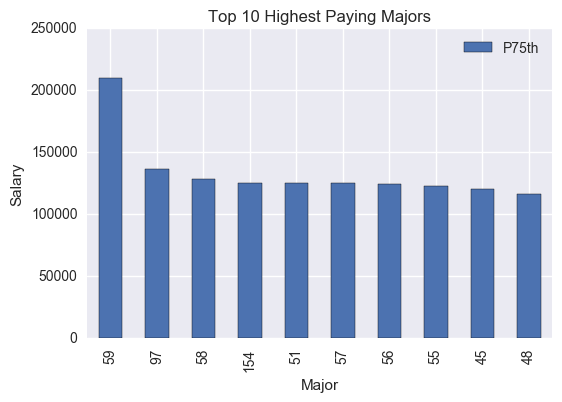

In [186]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
majors[['Major','P75th']].sort_values(by='P75th', ascending = False).head(10).plot(kind='bar',title='Top 10 Highest Paying Majors')

plt.xlabel('Major')
plt.ylabel('Salary')

In [47]:
# 5. What is the average median salary for each major category?
majors[['Major','Median']].sort_values(by='Median', ascending = False).head(10)


,Major,Median
59,PETROLEUM ENGINEERING,125000
154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,106000
57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,97000
55,METALLURGICAL ENGINEERING,96000
58,NUCLEAR ENGINEERING,95000
56,MINING AND MINERAL ENGINEERING,92000
97,MATHEMATICS AND COMPUTER SCIENCE,92000
48,ELECTRICAL ENGINEERING,88000
45,CHEMICAL ENGINEERING,86000
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,85000


In [39]:
# 6. Show only the top 5 paying major categories
majors[['Major_category','P75th']].sort_values(by='P75th', ascending = False).head()


,Major_category,P75th
59,Engineering,210000.0
97,Computers & Mathematics,136000.0
58,Engineering,128000.0
154,Health,125000.0
51,Engineering,125000.0


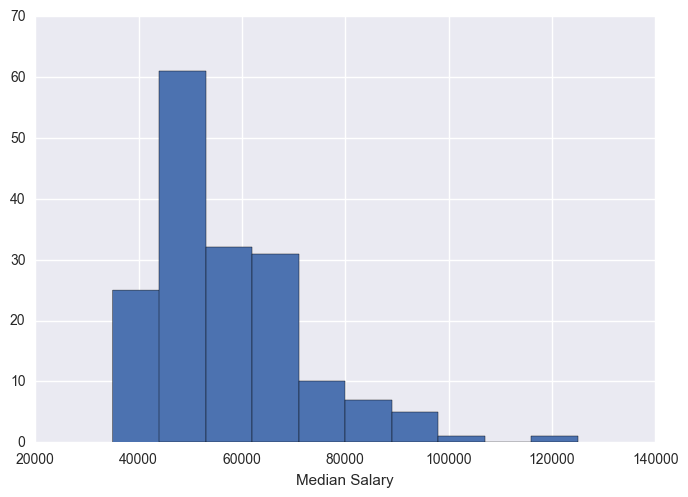

In [40]:
# 7. Plot a histogram of the distribution of median salaries

majors.Median.hist()
plt.xlabel('Median Salary')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cd3bf50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e021190>]], dtype=object)

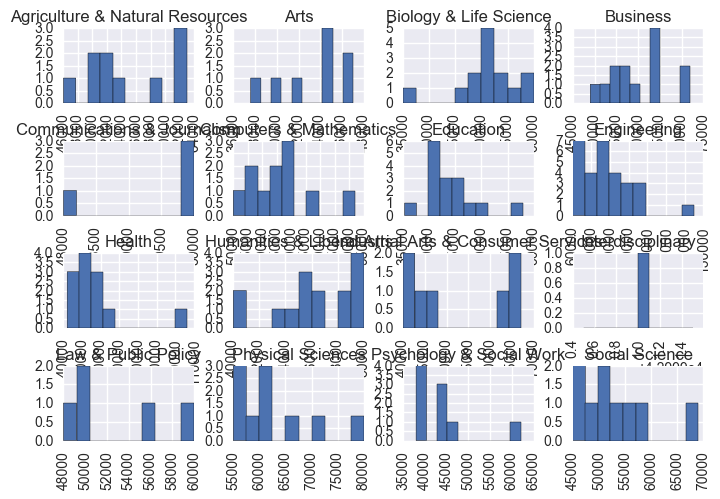

In [41]:
# 8. Plot a histogram of the distribution of median salaries by major category

# majors.groupby('Major_category').Median.hist()
majors.Median.hist(by=majors.Major_category)

In [42]:
# 9. What are the top 10 most UNemployed majors?
majors[['Major', 'Unemployed']].sort_index(by='Unemployed', ascending=False).head(10)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,Major,Unemployed
161,BUSINESS MANAGEMENT AND ADMINISTRATION,147261
158,GENERAL BUSINESS,85626
114,PSYCHOLOGY,79066
159,ACCOUNTING,75379
13,COMMUNICATIONS,54390
73,ENGLISH LANGUAGE AND LITERATURE,52248
164,MARKETING AND MARKETING RESEARCH,51839
132,POLITICAL SCIENCE AND GOVERNMENT,40376
25,GENERAL EDUCATION,38742
78,BIOLOGY,36757


In [43]:
# What are the unemployment rates?
majors[['Major', 'Unemployment_rate']].sort_index(by='Unemployment_rate', ascending=False).head(10)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,Major,Unemployment_rate
146,MISCELLANEOUS FINE ARTS,0.156147
116,CLINICAL PSYCHOLOGY,0.102712
93,MILITARY TECHNOLOGIES,0.101796
27,SCHOOL STUDENT COUNSELING,0.101746
77,LIBRARY SCIENCE,0.094843
141,VISUAL AND PERFORMING ARTS,0.094658
19,COMPUTER PROGRAMMING AND DATA PROCESSING,0.090264
119,SOCIAL PSYCHOLOGY,0.087336
104,ASTRONOMY AND ASTROPHYSICS,0.086022
11,ARCHITECTURE,0.085991


In [44]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?
# data.groupby(['col1', 'col2'])['col3'].mean()
majors.groupby(['Major_category','Unemployed']).mean().sort_values(by = 'Unemployment_rate', ascending = False).head()


Unnamed: 0  Major_code  Total  \
Major_category                      Unemployed                                  
Arts                                1190               146        6099   8511   
Psychology & Social Work            587                116        5202   7638   
Industrial Arts & Consumer Services 187                 93        3801   4315   
Education                           169                 27        2303   2396   
                                    743                 77        3501  16193   

                                                Employed  \
Major_category                      Unemployed             
Arts                                1190            6431   
Psychology & Social Work            587             5128   
Industrial Arts & Consumer Services 187             1650   
Education                           169             1492   
                                    743             7091   

                                                Employed_full_time_year_round  \
Major_category                      Unemployed                                  
Arts                                1190                                 3802   
Psychology & Social Work            587                                  3297   
Industrial Arts & Consumer Services 187                                  1708   
Education                           169                                  1093   
                                    743                                  4330   

                                                Unemployment_rate  Median  \
Major_category                      Unemployed                              
Arts                                1190                 0.156147   45000   
Psychology & Social Work            587                  0.102712   45000   
Industrial Arts & Consumer Services 187                  0.101796   64000   
Education                           169                  0.101746   41000   
                                    743                  0.094843   40000   

                                                P25th    P75th  
Major_category                      Unemployed                  
Arts                                1190        30000  60000.0  
Psychology & Social Work            587         26100  62000.0  
Industrial Arts & Consumer Services 187         39750  90000.0  
Education                           169         33200  50000.0  
                                    743         30000  55000.0

In [45]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042
majors['Employment_rate'] = majors['Employed'] / majors['Total']
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Employment_rate
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0,0.704225
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0,0.806338
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0,0.775173
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0,0.783948
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0,0.711738


In [46]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"

majors['Employment_rate'] = 1 - majors['Unemployment_rate']
majors.head()


,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Employment_rate
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0,0.973853
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0,0.971364
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0,0.969752
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0,0.957321
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0,0.950812
